# Introdução

No início do terceiro triênio da estratégia em rede <strong data-cite="feldhaus2012gestao">(Calegari, 2012)</strong> idealizada em 2009 por Diego Calegari, o então Presidente Executivo da Brasil Júnior, era chegada a hora de, finalmente, direcionar o Movimento Empresa Júnior rumo a impactar o mercado brasileiro com soluções de custo reduzido, de boa qualidade e de grande potencial inovador.

Depois de um primeiro triênio cujo maior desafio foi estabelecer o conceito de Empresa Júnior como se entende hoje e um segundo triênio dedicado a melhorar os processos de gestão das EJs, Ianna Brandão, Diretora de Desenvolvimento da Rede em 2016, deu início ao ciclo estratégico cujo mote se tornou "Mais e Melhores Projetos". A clareza e o foco que as estratégias e os conceitos por ela criados trouxeram, como a definição única de "projeto" e uma plataforma integrada para auditoria (ideia mãe do Portal BJ), foram em grande parte responsáveis por gerar, em pouco mais de 2 anos ,tanto resultado quanto se havia gerado nos 27 anos anteriores do Movimento.

A nova riqueza e complexidade que abarcou o Movimento fez as antigas estratégias de suporte da Brasil Júnior e das Federações se tornarem insuficientes. Como prestariam o tão necessário direcionamento que as EJs precisavam num contexto tão diverso? Este foi o problema motivador da criação do Sistema de Clusters ainda em 2016 <strong data-cite="clusters2017">(Leite, 2017)</strong> que trouxe como solução a separação das EJs em grupos, ou *clusters*, de acordo com as dores que estas comumente sentem ao longo dos seus estágios de amadurecimento.

Em 2019, após a recriação da estratégia compartilhada da rede através do projeto "Futuro do MEJ", tornou-se necessário reconstruir os fundamentos da clusterização. Este processo culminou no atual entendimento do conceito de cluster e das dores associadas a cada um deles. Uma descrição mais detalhada destes tópicos pode ser encontrada [neste link](bit.ly/CLUSTERS) <strong data-cite="clusters2019">(Bezerra, 2019)</strong>.

Abaixo, busca-se analisar os dados gerados a partir do formulário de diagnóstico das Empresas Juniores inscritas no Programa de Suporte da SERJÚNIOR em 2020 idealizado sob a ótica deste Sistema de Clusters. Além de tentar entender quão bem este framework descreve e diferencia a rede sergipana, almeja-se extrair insigths práticos capazes de melhor direcionar as táticas locais de suporte.

# Análise

## Considerações Iniciais

Todos os dados e arquivos utilizados, incluindo a versão editável deste documento, podem ser encontrados [neste repositório](https://github.com/gustavomello9600/clusters).

**Ao leitor não técnico, recomenda-se que se leia de forma superficial as etapas de Tratamento e Modelagem e que se dê especial ênfase à etapa de Discussão. Nas seções de código, é suficiente ler apenas as linhas que se iniciam com "#".**

Ao longo do texto, buscou-se esclarecer em linguagem simples e natural, até onde viável, o significado dos conceitos abordados e do código empregado. Foram levados em conta, ainda, os procedimentos necessários para garantir a reprodutibilidade da análise.

Todas as ferramentas utilizadas são provenientes de bibliotecas gratuitas das linguagens de programação R e Python.

## Tratamento

As linhas de código abaixo servem para garantir que, em qualquer sistema operacional, o programa consiga alcançar os dados.

In [1]:
#Traz as ferramentas que o Python precisa para se mover dentre
#as pastas do sistema operacional em que está sendo executado
import os

#Ensina o Python a encontrar os dados do diagnóstico
caminho_para_os_dados =  os.path.join("dados",
                                      "clusters.csv")

#Carrega a integração entre as linguagens R e Python
%load_ext rpy2.ipython

Para facilitar a análise, os dados são formatados em tabelas no padrão **tidy**, isto é, que contém apenas uma variável por coluna e apenas uma observação por linha. As tabelas são salvas em formato CSV na pasta "resultados" e podem ser trabalhadas via Google Planilhas ou Excel. 

In [24]:
%%R -i caminho_para_os_dados
#Chama a linguagem R e fornece o caminho para os dados do diagnóstico

#Carrega as ferramentas de análise
library(tidyverse)

#Lê os dados e os formata para análise
entrada <- read.csv(caminho_para_os_dados)
entrada <- as_tibble(entrada)

#Processa e organiza os dados carregados 
processada <- entrada %>%
                  pivot_longer(
                       cols = -EJs,
                       names_to = c("Eixo", "Cluster", "Dores"),
                       names_pattern = "([A-Z]+)_([1-5])_([1-5])",
                       values_to = "Resposta")
    
#Agrupa os dados por EJ, Cluster e Eixo e calcula a média das
#respostas para cada um desses grupos
empresas_juniores <- processada %>%
                         group_by(EJs, Cluster, Eixo) %>%
                         summarise(Media=mean(Resposta))

#Gera uma base de dados para cada Eixo
ejs_por_MN <- empresas_juniores %>% filter(Eixo == "MN")
ejs_por_VM <- empresas_juniores %>% filter(Eixo == "VM")
ejs_por_TC <- empresas_juniores %>% filter(Eixo == "TC")
ejs_por_GO <- empresas_juniores %>% filter(Eixo == "GO")


#Agrupa os dados por EJ e Cluster e calcula a
#média das respostas para cada um desses grupos
ejs_por_cluster <- empresas_juniores %>%
                       group_by(EJs, Cluster) %>%
                       summarise(Media=mean(Media))
        
#Agrupa os dados por Cluster, Eixo e Dores,
#calcula a média para cada grupo e organiza a tabela
#de modo que as dores mais presentes fiquem no topo
dores <- processada %>%
             group_by(Cluster, Eixo, Dores) %>%
             summarise(Media=mean(Resposta)) %>%
             arrange(desc(Media))

#Sumariza as dores por eixo
eixos <- dores %>%
             group_by(Eixo) %>%
             summarize(Media=mean(Media)) %>%
             arrange(desc(Media))
            
#Escreve as tabelas nos arquivos correspondentes
#dentro da pasta "resultados"
setwd("resultado")
write.csv(entrada, "entrada.csv", row.names = FALSE)
write.csv(processada, "processada.csv", row.names = FALSE)
write.csv(empresas_juniores, "empresas_juniores.csv", row.names = FALSE)
write.csv(ejs_por_MN, "ejs_por_MN.csv", row.names = FALSE)
write.csv(ejs_por_VM, "ejs_por_VM.csv", row.names = FALSE)
write.csv(ejs_por_TC, "ejs_por_TC.csv", row.names = FALSE)
write.csv(ejs_por_GO, "ejs_por_GO.csv", row.names = FALSE)
write.csv(ejs_por_cluster, "ejs_por_cluster.csv", row.names = FALSE)
write.csv(dores, "dores.csv", row.names = FALSE)
write.csv(eixos, "eixos.csv", row.names = FALSE)

#Mostra as primeiras linhas da tabela de dores
print(head(dores))

#Mostra o sumário por eixo
eixos

`summarise()` regrouping output by 'EJs', 'Cluster' (override with `.groups` argument)
`summarise()` regrouping output by 'EJs' (override with `.groups` argument)
`summarise()` regrouping output by 'Cluster', 'Eixo' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)
# A tibble: 6 x 4
# Groups:   Cluster, Eixo [5]
  Cluster Eixo  Dores Media
  <chr>   <chr> <chr> <dbl>
1 5       VM    2      3   
2 5       VM    1      2.67
3 2       TC    1      2.58
4 3       TC    2      2.58
5 1       TC    1      2.5 
6 4       VM    1      2.5 
# A tibble: 4 x 2
  Eixo  Media
  <chr> <dbl>
1 VM     2.17
2 TC     1.94
3 MN     1.73
4 GO     1.69


O que a primeira tabela nos diz em sua primeira linha, por exemplo, é que a dor mais latente das EJs inscritas no programa de suporte, de acordo com suas respostas ao formulário de diagnóstico, é a 2ª dor do eixo de Vendas & Mercado no Cluster 5. Consultando-la, vemos que corresponde a:

> Temos dificuldade de encontrar nichos de mercados alternativos para serem explorados e posicionar nossa marca em canais que os atinjam.

As demais dores, em ordem de colocação, são:

> Não realizamos investimentos em estruturas que tornem nosso processo de vendas mais inteligente e automatizado.

> O engajamento dos nossos membros é muito desproporcional, o que gera picos de produtividade e inconstância de resultados.

> Nossos membros são pouco proativos em empreenderem mudanças importantes para a nossa EJ.

> Temos dificuldade em atrair membros para a EJ.

> Não temos uma inteligência de vendas para tornar a prospecção de novos negócios e vendas mais eficiente.

Já a segunda tabela mostra que a maioria das dores estão concentradas nos eixos de **Vendas & Mercado** e **Time & Cultura**.

## Modelagem
A modelagem é a etapa em que se buscam padrões dentro dos dados. Duas técnicas são aqui empregadas: A Análise de Componentes Principais, ou **PCA**, e a Análise Fatorial

### Análise de Componentes Principais

Consiste em encontrar os padrões de variação mais comuns em um grupo de dados. Para os fins desta análise, considera-se que o padrão de identificação geral de uma EJ com as dores de cada cluster pode ser representada como um sinal, isto é, como na imagem abaixo:

![EJs](output_9_1.png)

A EJ hipotética acima representada em azul tem um "Sinal de Cluster" mais forte no 1 e no 4. Na prática, isto significa que a maior parte das suas dores estão no cluster 1, uma menor parte no 4 e nenhuma nas demais. Repare que as EJs em verde e vermelho, representadas por traços pontilhados, tem perfis próximos. 

É notável ao olho humano que o sinal verde é mais próximo ao azul do que o vermelho o é. A Análise de Componentes Principais, ou PCA, como comumente é referida, enxerga, no entanto, os dois sinais como distantes do azul na mesma medida. Para contornar este problema, basta "espalhar" um pouco o sinal de cada EJ. Isto pode ser feito através de uma operação conhecida na Álgebra Linear como "mudança de base". O resultado de um sinal puro e unitário de cluster 1 ao ser "espalhado" é o que pode ser visto na figura abaixo:

![Sinal Espalhado](output_8_1.png)

O sinal azul é o original e o sinal amarelo é a sua versão distribuída. Distribuí-lo ajuda a conferir um peso maior para sua relação com cada cluster adjacente, isto é, ensina o método que uma EJ de cluster 4 é mais próxima de uma EJ de cluster 5 do que de uma EJ de cluster 1.

Cada sinal pode ser então entendido como um vetor de 5 dimensões, cada dimensão representando a força do sinal em cada cluster. A utilidade de interpretar os dados como sinais é que sinais, quando representados por vetores, conseguem tangibilizar a noção de distância ou diferença na forma de cálculos matemáticos.

As próximas linhas de código tem por objetivo ensinar o Python a trabalhar os sinais de cluster e são necessárias para a PCA. O leitor não técnico pode pulá-las sem prejuízo de entendimento.

In [3]:
#Traz uma ferramenta de cálculo numérico para o Python
import numpy as np

#Permite que o Python consiga verificar se uma dada
#variável é ou não um número
from numbers import Number

#Carrega um método de inversão de matrizes
from numpy.linalg import inv as inversa


#Dá forma ao conceito de Sinal de Cluster dentro do Pythom
class Sinal_de_Cluster:
    
    #Introduz a base canônica, isto é, aquela onde os sinais
    #estão em sua forma original ou não espalhada
    bases = {"c": ((1, 0, 0, 0, 0),
                   (0, 1, 0, 0, 0),
                   (0, 0, 1, 0, 0),
                   (0, 0, 0, 1, 0),
                   (0, 0, 0, 0, 1))
             }
    
    #Ensina o Python a definir uma nova base
    @classmethod
    def definir_base(cls, símbolo, matriz, normal=True):
        if not normal:
            cls.bases[símbolo] = matriz
        else:
            vetores_da_base = [[coord[i] for coord in matriz]
                                for i in range(len(matriz[0]))]
            sinais_da_base = [Sinal_de_Cluster(vetor)
                              for vetor in vetores_da_base]
            base_normalizada = [sinal/abs(sinal)
                                for sinal in sinais_da_base]
            cls.bases[símbolo] = [
                
                [base[i] for base in base_normalizada]
                 for i in range(len(base_normalizada[0]))
            ]
            
    #Ensina o Python a construir um Sinal de Cluster
    def __init__(self, vetor, base="c", name=None):
        self.base = base
        self.coordenadas = [coord for coord in vetor]
        self.pontos = [0] + self.coordenadas + [0]
        self.T = [[coord] for coord in vetor]
        if name is None: self.name="Sem Nome"
        else: self.name = name
        
    #Ensina o Python a calcular um produto interno     
    def interno(self, other):
        resultado = 0
        for i in range (7):
            k = 1
            if i == 0 or i == 6: k = 0.5
            resultado += k * self.pontos[i] * other.pontos[i]
        return resultado
    
    #Ensina o Python a normalizar um sinal, isto é, reduzí-lo a
    #uma versão que esteja a uma unidade de distância da origem,
    #ou seja, do sinal nulo
    def normalizado(self):
        return self/(abs(self))
    
    #Todas as definições a seguir servem para ensinar o Python a operar
    #os sinais, isto é, realizar somas, subtrações, multiplicações
    #e divisões entre eles.
    
    def __add__(self, other):
        vetor = [self.coordenadas[i]
                 + other.coordenadas[i]
                 for i in range(5)]
        return Sinal_de_Cluster(vetor, base=self.base)
    
    def __radd__(self, other):
        if other == 0:
            return self
    
    def __sub__(self, other):
        vetor = [self.coordenadas[i]
                 - other.coordenadas[i]
                 for i in range(5)]
        return Sinal_de_Cluster(vetor, base=self.base)
    
    def __mul__(self, other):
        if isinstance(other, Sinal_de_Cluster):
            return self.interno(other)
        elif isinstance(other, Number):
            return other*self
        else:
            raise NotImplementedError
            
    def __truediv__(self, other):
        if isinstance(other, Number):
            return self * (1/other)
    
    def __rmul__(self, other):
        if isinstance(other, Number):
            vetor = [other * coord for
                     coord in self.coordenadas]
            return Sinal_de_Cluster(vetor, base=self.base)
        else:
            raise NotImplementedError
    
    #Ensina o Python a calcular o módulo de um sinal, isto é,
    #sua distância à origem (sinal nulo)
    def __abs__(self):
        return float((self * self) ** (1/2))
    
    #Ensina o Python a calcular o número de dimensões de um sinal
    def __len__(self):
        return len(self.coordenadas)
    
    #Ensina o Python a ver as coordenadas do vetor que representa
    #o sinal
    def __getitem__(self, i):
        return self.coordenadas[i]
    
    #Ensina o Python a mudar um vetor de base
    def para_a_base(self, base):
        if base == self.base:
            return self
        else:
            atual_para_c = Sinal_de_Cluster.bases[self.base]
            c_para_base = inversa(
                np.array(Sinal_de_Cluster.bases[base]))
            array = c_para_base @ atual_para_c @ np.array(self.T)
            return Sinal_de_Cluster([n[0] for n in array],
                                    base=base, name=self.name)
        
    #As definições abaixo ensinam o Python a representar um vetor
    #de forma entendível por pessoas
    def __repr__(self):
        return self.name + ":\n" + np.array(self.T).__repr__(
               ) + "\nbase {}".format(self.base)
    
    def __str__(self):
        return self.name + ":" + np.array(self.T).__str__(
               ) + " base {}".format(self.base)
    

#Ensina como distribuir cada sinal unitário
matriz_da_base_C = (
    
    (8, 4, 2, 1, 1),
    (4, 8, 4, 2, 1),
    (2, 4, 8, 4, 2),
    (1, 2, 4, 8, 4),
    (1, 1, 2, 4, 8))

#Define a base onde os sinais se encontram distribuídos
Sinal_de_Cluster.definir_base(
         "C", matriz_da_base_C)

O próximo passo é processar os dados de cada EJ como sinais:

In [4]:
#Traz uma ferramenta de análise de dados tabelados para o Python
import pandas as pd

#Recupera as tabelas com os dados previamente processados pelo R
%R -o ejs_por_cluster 

#Recupera o nome de cada EJ
EJs = pd.unique(ejs_por_cluster["EJs"])

#Cria uma lista vazia para adicionar os sinais
sinais = []

#Para cada EJ dentre todas as EJs
for EJ in EJs:
    
    #Extrai as linhas da tabela que tratam da EJ
    linhas_da_EJ = ejs_por_cluster[ejs_por_cluster["EJs"] == EJ]
    
    #Cria uma lista vazia para preencher com o seu sinal
    sinal = []
    
    #Para cada linha dentre todas as linhas
    for índice, linha in linhas_da_EJ.iterrows():
        
        #Adiciona o valor do sinal de cada cluster
        sinal.append(linha["Media"])
        
    #Adiciona o sinal à lista de sinais identificando a EJ
    sinais.append((EJ, sinal))

#Processa os sinais para que seja possível trabalhar com eles
sinais_das_EJs = [Sinal_de_Cluster(sinal, base="C", name=EJ).para_a_base("c")
                  for EJ, sinal in sinais]

Enxergando os sinais das 3 primeiras EJs:

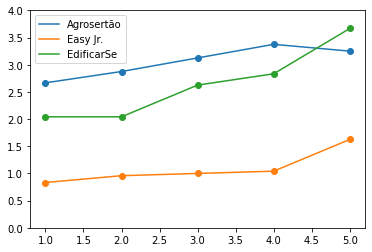

In [5]:
#Carrega as ferramentas de criação de gráficos
%matplotlib inline
from matplotlib import pyplot as plt

#Configura o eixo X do gráfico
X =[0, 1, 2, 3, 4, 5, 6]

#Mostra os sinais das 3 primeiras EJs
for sinal_de_EJ in sinais_das_EJs[:3]:
    
    #Traduz o sinal para base de entrada
    sinal_de_EJ = sinal_de_EJ.para_a_base("C")
    
    #Joga o sinal no gráfico
    plt.plot(X[1:-1], sinal_de_EJ.pontos[1:-1])
    plt.scatter(X[1:-1], sinal_de_EJ.pontos[1:-1])

#Define os limites do eixo y    
plt.ylim((0, 4))

#Adiciona uma legenda com os nomes das EJs do gráfico
plt.legend([sinal_de_EJ.name for sinal_de_EJ in sinais_das_EJs[:3]])

Interpretando o gráfico acima, notamos que as dores se acumulam de acordo com os clusters de maneira quase linear. Calculando a média dos sinais de todas as EJs, tem-se:

(0.0, 4.0)

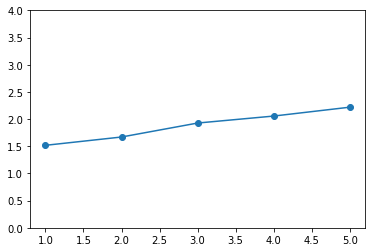

In [6]:
#Calcula a média
EJ_média = sum(sinais_das_EJs)/len(sinais_das_EJs)

#Joga no gráfico
EJ_média_em_C = EJ_média.para_a_base("C")
plt.plot(X[1:-1], EJ_média_em_C.pontos[1:-1])
plt.scatter(X[1:-1], EJ_média_em_C.pontos[1:-1])

#Define os limites do eixo y
plt.ylim((0, 4))


O que esse gráfico linear indica é que, na média, as dores se acumulam a cada cluster. Uma EJ de cluster 3, por exemplo, enxerga menos desafios de cluster 1 e 2 e mais desafios nas dores de cluster 4 e 5.

Seguindo com a PCA, subtrai-se a média de cada sinal para centralizá-los:

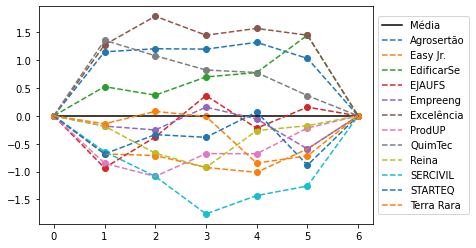

In [7]:
#Centraliza os sinais em relação à média
sinais_centrados = [EJ - EJ_média for EJ in sinais_das_EJs]

#Põe a média no gráfico em preto com traço cheio
plt.plot(X, [0] * 7, "black")

#Põe os sinais centrados no gráfico com traço vazado
for EJ in sinais_centrados:
    EJ = EJ.para_a_base("C")
    plt.plot(X, EJ.pontos, "--")
    plt.scatter(X, EJ.pontos)

#Adiciona a legenda
plt.legend(["Média"] + [sinal_de_EJ.name for sinal_de_EJ in sinais_das_EJs], loc="center left", bbox_to_anchor=(1, 0.5))

Encontrar as componentes principais consiste em determinar os eixos de maior variação a partir da média. Isto é feito a partir:

1. Da determinação da matriz de covariância. Ela estabelece como as dimensões dos dados estão relacionadas entre si.

2. Do cálculo dos autovetores e autovalores. Os autovetores representam os eixos, perpendiculares entre si, onde há maior variação. Seus autovalores representam quanto os dados variam na direção correspondente. 

In [8]:
#Traz a ferramenta de cálculo de autovetores e autovalores
from numpy.linalg import eig as auto

#Cálculo da matriz de covariância
cov = covariância_EJs = [
    [sum([sinais_centrados[k][i]
          * sinais_centrados[k][j]
                     for k in range(len(EJs))]
        )/len(EJs)
        
        for j in range(5)]
        for i in range(5)]

#Retorna as variâncias (autovalores) e suas
#correspondentes direções (autovetores)
variâncias, vetores = auto(cov)

#Consegue as posições das variâncias necessárias
#para que sejam dispostas em ordem decrescente
índices = variâncias.argsort()[::-1]

#Põe as variâncias e seus respectivos vetores em ordem decrescente
variâncias = variâncias[índices]
vetores = vetores[:, índices]

#Transforma as variâncias de vetores para números
variâncias = [float(var) for var in variâncias]

Para enxergar como a variância já calculada se distribui entre os eixos, constrói-se o ranking como abaixo:

In [9]:
#Cria o ranking mostrado abaixo
print("""
  Variância  Percentual
  
1ª vetor: {0:.2f}  | {5:.2f}% do total
2ª vetor:  {1:.2f}  | {6:.2f}% do total 
3ª vetor:  {2:.2f}  | {7:.2f}% do total 
4ª vetor:  {3:.2f}  | {8:.2f}% do total 
5ª vetor:  {4:.3f} | {9:.2f}% do total 
""".format(*variâncias, *[100 * var/sum(variâncias) for var in variâncias])
     )


  Variância  Percentual
  
1ª vetor: 11.79  | 97.75% do total
2ª vetor:  0.21  | 1.74% do total 
3ª vetor:  0.05  | 0.43% do total 
4ª vetor:  0.01  | 0.07% do total 
5ª vetor:  0.002 | 0.02% do total 



Visualizar dados que tem 5 dimensões é um desafio, mas utilizando somente os 2 primeiros vetores como eixos (que contém juntos 99,5% de toda a variação) para representar os dados em apenas duas dimensões, pode-se ter uma compreensão mais simples e sem perda de profundidade. Os vetores que concentram a maior parte da variância se chamam "componentes principais".

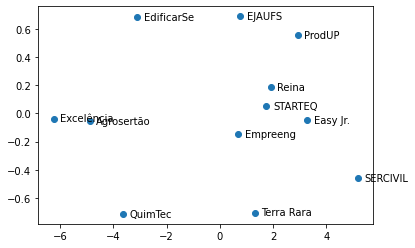

In [10]:
#Determina as coordenadas das projeções dos vetores das EJs
#no plano formado pelas 2 componentes principais
projeção = (vetores[:, [0, 1]].T
            @ np.hstack([sinal.T for sinal in sinais_centrados])
)

#Gera o gráfico abaixo
plt.scatter(projeção[0], projeção[1])

#Adiciona o nome das EJs
for i, sinal in enumerate(sinais_das_EJs):
    plt.annotate(sinal.name, (projeção[0][i] + 0.25, projeção[1][i] - 0.02))

É interessante dividir as EJs em grupos de acordo com como elas se distribuíram no gráfico acima.

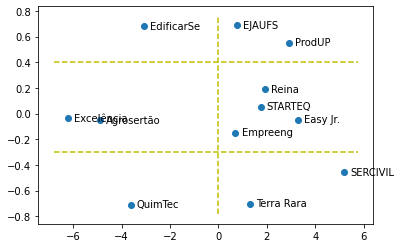

In [11]:
#Recria o gráfico acima
plt.scatter(projeção[0], projeção[1])

#Separa as EJs em grupos
for i, sinal in enumerate(sinais_das_EJs):
    x, y = projeção[0][i], projeção[1][i]
    if y > 0.4:
        if x < 0: sinal.grupo = "Grupo 1"
        else:     sinal.grupo = "Grupo 2"
    elif y >-0.3:
        if x < 0: sinal.grupo = "Grupo 3"
        else:      sinal.grupo ="Grupo 4"
    else:
        if x < 0: sinal.grupo = "Grupo 5"
        else:      sinal.grupo ="Grupo 6"
            
    plt.annotate(sinal.name, (x + 0.25, y - 0.02))

#Define os limites dos eixos (sem as margens)
y_lim_i, y_lim_s = plt.ylim()
x_lim_i, x_lim_s = plt.xlim()

#Traça as retas amarelas pontilhadas
plt.plot([x_lim_i, x_lim_s], [0.4, 0.4], "y--")
plt.plot([x_lim_i, x_lim_s], [-0.3, -0.3], "y--")
plt.plot([0, 0], [y_lim_i, y_lim_s], "y--")

#### Interpretação do Gráfico

As componentes principais calculadas para os dados das EJs foram:

$$
v_{1} = \begin{bmatrix}
-0.39\\ 
-0.47\\ 
-0.50\\ 
-0.47\\ 
-0.40
\end{bmatrix}, v_{2} = \begin{bmatrix}
-0.56\\ 
-0.44\\ 
0.02\\ 
0.37\\ 
0.60
\end{bmatrix}
$$

Pelos seus perfis, pode-se dizer que a primeira componente mede, a grosso modo, a intensidade das dores das EJs ao passo que a segunda mede o quanto as dores estão concentradas nos cluster maiores em detrimento dos menores.

Isto significa que, quanto mais para cima no gráfico a EJ está, maior é a maturidade autorrelatada. Em outras palavras, quanto mais para cima mais a EJ se considera madura. Quanto mais à esquerda, mais a EJ "sofre" de modo geral, isto é, mais forte ela sente as dores do formulário como um todo. 

Ao delinear aos grupos, chegamos então a:

##### Grupo 1
*EdificarSe*

EJ que se percebe como madura e com dores intensas. Suas dores são fortes e mais características dos clusters 4 e 5.

##### Grupo 2
*EJAUFS e ProdUP*

EJs que se percebem como maduras e com dores amenas. Suas dores são moderadas e mais características dos clusters 4 e 5.

##### Grupo 3
*Excelência e Agrosertão*

EJs que se percebem como moderadamente maduras e com dores fortes. Suas dores são intensas e diversas: não se enquadram bem em um cluster ou outro.

##### Grupo 4
*REINA, STARTEQ, Easy e Empreeng*

EJs que se percebem como moderadamente maduras e com dores amenas. Suas dores são menos intensas e mais diversas: não se enquadram bem um cluster ou outro.

##### Grupo 5
*QuimTec*

EJ que se percebe como imatura e com dores fortes. Suas dores são intensas e concentradas nos clusters 1 e 2.

##### Grupo 6
*Terra Rara e SERCIVIL*

EJs que se percebem como imaturas e com dores amenas. Suas dores são menos intensas e concentradas nos clusters 1 e 2.

Abaixo se mostra o perfil das dores de cada grupo em relação à média.

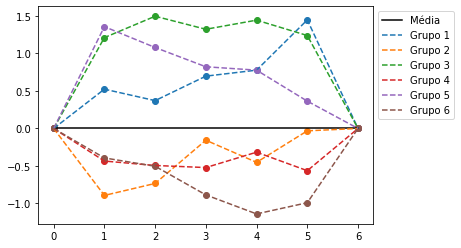

In [12]:
Média_Grupo = dict()

#Põe a média no gráfico em preto com traço cheio
plt.plot(X, [0] * 7, "black")

for i in range(1, 6 + 1):
    EJs_do_grupo = [EJ for EJ in sinais_das_EJs if EJ.grupo == "Grupo {}".format(i)]
    Média_Grupo[i] = sum(EJs_do_grupo)/len(EJs_do_grupo)
    
for i in Média_Grupo:
    plt.plot(X, (Média_Grupo[i] - EJ_média).para_a_base("C").pontos, "--")
    plt.scatter(X, (Média_Grupo[i] - EJ_média).para_a_base("C").pontos)
    
plt.legend(["Média"] + ["Grupo {}".format(i) for i in range(1, 6 + 1)], bbox_to_anchor=(1, 1))

### Análise Fatorial

Esta técnica consiste em olhar para as respostas que estão mais correlacionadas e, a partir delas, inferir fatores ocultos. A premissa é que, se um mesmo grupo de perguntas quase sempre tem o mesmo padrão de respostas, existe algo por trás delas que faz com que elas estejam relacionadas. A este algo se dá o nome de "fator".

In [13]:
#Importa do R os dados não processados
%R -o entrada

#Mostra um recorte da tabela original
entrada.iloc[:, ::5]

,EJs,MN_3_1,MN_5_2,VM_3_1,VM_5_2,GO_3_1,GO_5_2,TC_2_1,TC_3_3,TC_5_2
1,Excelência,4,4,4,4,3,2,4,4,4
2,QuimTec,3,2,3,3,2,1,4,3,2
3,Empreeng,2,1,3,2,1,3,1,3,3
4,Terra Rara,1,0,1,3,3,0,4,2,2
5,STARTEQ,3,2,2,4,2,1,3,1,3
6,Easy Jr.,1,2,0,3,0,0,2,3,0
7,Reina,1,3,2,2,2,2,3,0,0
8,SERCIVIL,0,2,0,1,0,0,1,1,1
9,EJAUFS,2,3,2,3,2,0,3,1,1
10,ProdUP,2,2,0,2,0,1,1,2,3


Para garantir que a Análise Fatorial pode ser aplicada aos dados, realiza-se o teste Kaiser-Meyer-Olkin que deve resultar em um valor superior a **0,6**.

In [14]:
#Prepara os dados para análise
dados = pd.concat([entrada]*100)
dados.drop("EJs", axis=1, inplace=True)

#Traz o método de validação da Análise Fatorial para uso
from factor_analyzer.factor_analyzer import calculate_kmo as KMO

#Realiza o teste
_, kmo = KMO(dados)

#Mostra o resultado
"KMO dos dados: {:.3f}".format(kmo)

'KMO dos dados: 0.668'

Garantido que os dados comportam a análise, seleciona-se o número de fatores ocultos relevantes. Para tal, basta que eles possuam uma influência de ao menos uma unidade na variância dos dados.

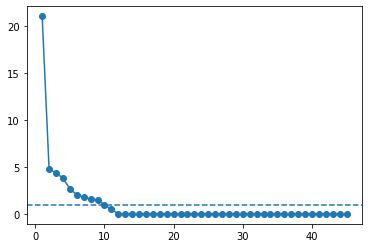

In [15]:
#Traz a ferramenta de Análise Fatorial para uso
from factor_analyzer import FactorAnalyzer

#Realiza a análise chutando que existem 10 fatores
#não observados de forma direta
fa = FactorAnalyzer(n_factors=10).fit(dados)

#Retorna as variância correspondentes
variâncias, vetores = fa.get_eigenvalues()

#Mostra as variâncias no gráfico abaixo
plt.scatter(range(1, len(variâncias) + 1), variâncias)
plt.plot(range(1, len(variâncias) + 1), variâncias)
plt.axhline(1, ls="--")

9 fatores se mostraram relevantes. O próximo passo é entender em quais dores cada fator impacta:

In [16]:
#Realiza a análise considerando 9 fatores ocultos
fa = FactorAnalyzer(n_factors=9, rotation="varimax", method="ml").fit(dados)

#Forma uma tabela com o peso que cada fator tem em cada uma das dores
pesos = pd.DataFrame(fa.loadings_,
                     index=dados.columns,
                     columns=["Fator {}".format(i) for i in range(1, 9 + 1)])

#Mostra as dez primeiras linhas da tabela
pesos.head(10)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6,Fator 7,Fator 8,Fator 9
MN_1_1,0.096958,0.101267,-0.019286,0.456746,-0.311860,0.674628,-0.018981,0.229355,0.328691
MN_1_2,0.314255,0.516119,0.081790,0.215020,0.012100,0.127399,0.317727,0.181422,0.629455
MN_2_1,-0.196399,0.666228,0.214213,0.221008,-0.257809,0.501520,0.169109,0.124106,0.152562
MN_2_2,0.351919,0.122261,0.191084,-0.120722,-0.122250,0.425940,0.714302,0.182986,0.081592
MN_3_1,0.371236,0.299391,0.656380,0.241820,0.180469,0.449557,-0.085802,0.120400,0.148548
MN_3_2,0.303640,0.030944,0.896841,0.066842,0.086123,-0.020807,0.232318,-0.036496,0.174688
MN_4_1,0.326851,0.564634,0.110013,0.616531,0.055414,0.169468,-0.019438,0.217756,0.305193
MN_4_2,0.614651,0.147073,0.291792,-0.012700,0.403696,0.224256,-0.060251,-0.249246,0.441157
MN_5_1,0.673417,0.288141,0.142240,0.255922,-0.086377,0.376660,0.341306,0.236831,0.079376
MN_5_2,0.865403,0.033744,0.169035,0.142892,0.158160,0.210680,-0.142675,-0.272068,-0.021659


Os números acima mostram a correlação entre cada dor e fator. A correlação é uma medida estatística que mede o quanto dois fenômenos se comportam de forma parecida. Uma correlação +1.0 indica uma associação perfeita, isto é, quando um dos fenômenos varia para cima o outro também o faz, na mesma proporção. Uma correlação de 0 indica que os dois são completamente independentes. Uma correlação de -1 indica uma associação também perfeita, porém quando um dos fenômenos varia numa direção o outro o faz na direção oposta e em mesma proporção .

Para cada fator, é interessante saber em quais dores este mais influencia, isto é, com quais dores ele mais se correlaciona em termos absolutos.

In [17]:
#Número de linhas da tabela
n = número_de_linhas = 10

#Cria uma tabela para o ranking inicialmente vazia
ranking = pd.DataFrame()

#Pega a lista de fatores a partir dos nomes
#das colunas da tabela de pesos
fatores = pesos.columns

#Para cada fator dentro todos os fatores
for fator in fatores:
    
    #Gera as posições de cada correlação na forma ordenada
    ordenação = np.array([abs(p) for p in pesos[fator]]).argsort()[::-1]
    
    #Coloca dentro da tabela do ranking as 10 primeiras
    #dores de acordo com a ordenação
    ranking[fator] = pesos.index[ordenação][:n]
    
    #Coloca dentro da tabela do ranking as influências (ou correlações)
    #de cada uma das primeiras dores
    ranking["Inf. de F{}".format(fator[-1])] = np.array(pesos[fator])[ordenação][:n]
    
#Gera os índices do ranking
ranking.index = range(1, número_de_linhas + 1)

#Mostra a tabela abaixo
ranking

,Fator 1,Inf. de F1,Fator 2,Inf. de F2,Fator 3,Inf. de F3,Fator 4,Inf. de F4,Fator 5,Inf. de F5,Fator 6,Inf. de F6,Fator 7,Inf. de F7,Fator 8,Inf. de F8,Fator 9,Inf. de F9
1,MN_5_2,0.865403,GO_3_1,0.854497,MN_3_2,0.896841,GO_5_2,0.824498,TC_1_2,-0.866915,VM_5_2,0.732908,TC_1_1,0.912592,GO_3_2,0.831406,MN_1_2,0.629455
2,GO_5_3,0.803823,TC_2_1,0.853089,TC_4_2,0.874347,VM_2_2,0.656332,GO_2_1,0.780496,TC_4_3,0.720750,MN_2_2,0.714302,TC_3_2,0.671735,TC_2_2,0.488556
3,GO_4_2,0.758221,VM_1_2,0.829135,TC_5_2,0.831448,MN_4_1,0.616531,GO_1_2,0.729493,MN_1_1,0.674628,TC_3_3,0.570885,TC_2_2,0.457031,VM_1_1,0.470644
4,VM_3_2,0.753950,GO_2_2,0.797854,MN_3_1,0.656380,GO_5_1,0.573766,VM_2_2,0.500708,TC_4_1,0.555872,VM_4_1,-0.464891,TC_3_1,0.418316,MN_4_2,0.441157
5,GO_5_1,0.736484,MN_2_1,0.666228,TC_5_1,0.643354,GO_4_1,0.564992,VM_4_1,0.498634,MN_2_1,0.501520,TC_2_2,0.429888,GO_1_2,-0.334826,TC_3_1,-0.397004
6,VM_5_1,0.719220,VM_3_1,0.572806,GO_4_1,0.593754,VM_3_1,0.542610,GO_1_1,0.476538,TC_1_3,0.477689,GO_1_2,0.423111,VM_2_1,0.297441,GO_1_1,0.351554
7,VM_1_1,0.718997,MN_4_1,0.564634,TC_1_3,0.581832,MN_1_1,0.456746,VM_2_1,0.471964,MN_3_1,0.449557,TC_3_1,0.415088,MN_5_2,-0.272068,GO_4_1,0.343811
8,VM_4_2,0.689540,TC_4_1,0.551035,TC_3_1,0.513510,GO_4_2,0.414943,TC_3_3,0.409669,MN_2_2,0.425940,VM_5_1,0.402830,GO_5_1,0.266799,MN_1_1,0.328691
9,MN_5_1,0.673417,VM_2_1,0.521646,TC_2_3,0.509286,VM_5_1,-0.406540,MN_4_2,0.403696,TC_2_3,0.386253,VM_4_2,0.391887,TC_3_3,0.261661,MN_4_1,0.305193
10,MN_4_2,0.614651,MN_1_2,0.516119,TC_2_2,0.503775,GO_2_1,0.373099,TC_3_2,0.371628,MN_5_1,0.376660,TC_1_3,0.363087,MN_4_2,-0.249246,VM_1_2,0.251699


Para entender a relevância de cada um desses fatores nas respostas como um todo, é possível calcular a influência que estes tem nas 10 dores com as quais estão mais correlacionados.

In [18]:
#Soma os quadrados das correlações para cada fator e mostra o resultado logo abaixo
ranking.iloc[:, 1::2].apply(lambda x: "{:.2f}%".format(10 * sum([a**2 for a in x])))

Inf. de F1    54.22%
Inf. de F2    47.15%
Inf. de F3    45.73%
Inf. de F4    31.19%
Inf. de F5    33.11%
Inf. de F6    29.75%
Inf. de F7    28.69%
Inf. de F8    20.03%
Inf. de F9    17.15%
dtype: object

Pela disposição dos dados e também por ser preferível trabalhar com menos agrupamentos, cabe limitar a análise aos fatores que tem no mínimo 30% de influência no resultado inicial, isto é, os 5 primeiros.

É necessário portanto refazer a análise considerando apenas 5 fatores.

In [19]:
#Realiza a análise considerando 5 fatores ocultos
fa = FactorAnalyzer(n_factors=5, rotation="varimax", method="ml").fit(dados)

#Forma uma tabela com o peso que cada fator tem em cada uma das dores
pesos = pd.DataFrame(fa.loadings_,
                     index=dados.columns,
                     columns=["Fator {}".format(i) for i in range(1, 5 + 1)])

#Cria uma tabela para o ranking inicialmente vazia
ranking = pd.DataFrame()

#Pega a lista de fatores a partir dos nomes
#das colunas da tabela de pesos
fatores = pesos.columns

#Para cada fator dentre todos os fatores
for fator in fatores:
    
    #Gera as posições de cada correlação na forma ordenada
    ordenação = np.array([abs(p) for p in pesos[fator]]).argsort()[::-1]
    
    #Coloca dentro da tabela do ranking as
    #dores de acordo com a ordenação
    ranking[fator] = pesos.index[ordenação]
    
    #Coloca dentro da tabela do ranking as influências
    #(ou correlações) de cada uma das primeiras dores
    ranking["Inf. de F{}".format(fator[-1])] = np.array(pesos[fator])[ordenação]
    
#Gera os índices do ranking
ranking.index = range(1, 45 + 1)

#Mostra a tabela abaixo
ranking.head(10)

,Fator 1,Inf. de F1,Fator 2,Inf. de F2,Fator 3,Inf. de F3,Fator 4,Inf. de F4,Fator 5,Inf. de F5
1,GO_4_2,0.909564,TC_4_2,0.851418,TC_2_1,0.825354,TC_1_2,0.919922,VM_5_1,0.901856
2,MN_5_2,0.864785,TC_5_2,0.844630,GO_3_1,0.775825,MN_1_1,0.637243,GO_5_3,0.537181
3,GO_5_1,0.819654,TC_1_3,0.826940,VM_1_2,0.759558,GO_1_2,-0.629887,MN_2_2,0.519273
4,GO_5_2,0.739956,MN_3_2,0.821183,VM_4_1,0.736951,GO_2_1,-0.599672,GO_5_2,-0.447594
5,VM_1_1,0.729221,TC_3_3,0.781793,VM_2_1,0.699816,MN_2_1,0.516245,VM_4_1,-0.445207
6,VM_3_2,0.715114,TC_1_1,0.727722,GO_2_2,0.681647,VM_5_2,0.443476,TC_1_1,0.439054
7,VM_4_2,0.691662,TC_3_1,0.670448,TC_4_1,0.665385,GO_3_2,0.367174,TC_2_2,0.430905
8,MN_4_2,0.634929,TC_2_3,0.653583,MN_4_1,0.665253,MN_5_1,0.353889,TC_5_2,-0.410354
9,TC_5_1,0.632273,TC_2_2,0.651965,VM_3_1,0.663513,MN_2_2,0.340288,MN_1_2,0.380261
10,GO_2_1,0.620590,TC_4_3,0.646029,MN_2_1,0.653540,TC_5_1,-0.331155,VM_1_1,0.359975


Para atribuir significado a cada fator, pode-se, finalmente, checar quais são as dores em que mais influenciam

In [20]:
#Importa as descrições das dores da planilha na pasta "dados"
descrição = pd.read_csv(os.path.join("dados", "descrição_das_dores.csv"))

#Para cada fator dentre todos os fatores
for fator in fatores:
    
    #Mostra, ali embaixo, qual fator está sendo analisado
    print("Dores associadas ao Fator {}:\n".format(fator[-1]))
    
    #Para um índice que varia de 1 a 5
    for i in range(1, 5 + 1):
        
        #Mostra a dar correspondente ao índice do ranking
        print("{}. {: .2f}% - {}: {}\n".format(
              i,
              100 * ranking["Inf. de F{}".format(fator[-1])][i],
              ranking[fator][i],
              descrição[ranking[fator][i]][0]))
        
    #Separa duas linhas entre fatores
    print("\n\n")

Dores associadas ao Fator 1:

1.  90.96% - GO_4_2: Não conseguimos inovar e explorar oportunidades no nosso modelo de negócios para ganhar competitividade no mercado.

2.  86.48% - MN_5_2: Não conseguimos desenvolver inovações disruptivas (que quebram padrões) e criativas para se destacar no mercado.

3.  81.97% - GO_5_1: Nossa estratégia não está voltada para a inovação no modelo de negócios.

4.  74.00% - GO_5_2: Nosso design organizacional não é completamente voltado para gerar o maior valor para o cliente.

5.  72.92% - VM_1_1: Não sabemos como buscar clientes para fechar projetos em nossa EJ e sempre vendemos os mesmos projetos, que são muito simples.




Dores associadas ao Fator 2:

1.  85.14% - TC_4_2: Nosso time é pouco empoderado para assumir maiores responsabilidades.

2.  84.46% - TC_5_2: Não conseguimos garantir a melhor performance de todos os membros reforçada pela cultura forte da EJ.

3.  82.69% - TC_1_3: Não existe uma formação de time na EJ com uma coesão interna suf

#### Interpretação dos Fatores

##### Fator 1
O Fator 1 diz respeito a dores que estão associadas com a capacidade de inovação das EJs. Sendo o fator mais preponderante, mostra que um conjunto muito grande de dores estão associadas com a falta de abertura ou habilidade para inovar. Portanto, será referido posteriormente como **Dificuldade de Inovar**

##### Fator 2
O Fator 2 diz respeito a dores associadas com um time pouco empoderado e responsável em EJs cuja cultura está enfraquecida. Decidiu-se por atribuir o nome de **Fragilidade da Cultura**.

##### Fator 3
O Fator 3 correlaciona dores associadas a processos de vendas mal estruturados e inefetivos. A ele, optou-se denonimar por **Inefetividade do Processo de Vendas**.

##### Fator 4
O Fator 4 indica um perfil de EJ que tem muitos membros alocados em projetos e processos internos bem estruturados, mas apresenta dificuldades em executá-los e em vendê-los. Sendo assim, referir-se-á por **Foco no Interno**.

##### Fator 5
O Fator 5 aglomera dores associadas com a dificuldade em alocar recursos financeiros e humanos de forma a trazer resultados de interesse para a EJ. Por isto, atribuiu-se o nome de **Dificuldade de Alavancagem**.

Quanto cada um desses fatores conseguem explicar o padrão de respostas de cada EJ? 

In [21]:
#Aplica o peso de cada fator a cada resposta
resultado = pd.DataFrame(dados[:12].values @ fa.loadings_)

#Nomeia as linhas com suas respectivas EJs
resultado.index = EJs

#Nomeia as colunas com os fatores
resultado.columns =["Dificuldade de Inovar",
                    "Fragilidade da Cultura",
                    "Inefetividade do Processo de Vendas",
                    "Foco no Interno",
                    "Deficiência em Alavancagem"]

#Mostra a tabela abaixo, em termos absolutos
resultado

,Dificuldade de Inovar,Fragilidade da Cultura,Inefetividade do Processo de Vendas,Foco no Interno,Deficiência em Alavancagem
Agrosertão,62.098267,63.253811,55.135155,-2.571117,11.881053
Easy Jr.,47.658170,45.205618,48.868094,6.856298,11.576366
EdificarSe,31.070347,30.238805,29.817294,-2.213332,-2.849676
EJAUFS,17.420173,29.415884,29.439124,11.296489,9.215499
Empreeng,20.738644,26.983057,28.785204,6.039154,-4.643235
Excelência,18.692631,19.705455,15.959129,2.556651,9.428101
ProdUP,31.697658,13.044475,24.356548,6.839405,6.839538
QuimTec,11.741393,8.920123,4.807479,-4.467224,4.421096
Reina,31.279942,23.396551,29.453228,-0.638194,7.719650
SERCIVIL,20.725631,27.398904,9.808033,0.148041,6.446280


Os resultados, como estão, são difíceis de interpretar. Para facilitar este processo, pode-se representá-los em percentis.

In [22]:
#Padroniza os resultados
resultado_padronizado = pd.DataFrame([(c - c.mean())/c.std() for c in [resultado[col] for col in resultado]]).T

#Diz ao Python como queremos que calcule os percentis
from scipy.stats import norm
percentil = norm.cdf

#Retorna o resultado em percentis
resultado_em_percentis = resultado_padronizado.applymap(lambda x: "{:.1f}%".format(100 * percentil(x)))

#Mostra a tabela abaixo
resultado_em_percentis

,Dificuldade de Inovar,Fragilidade da Cultura,Inefetividade do Processo de Vendas,Foco no Interno,Deficiência em Alavancagem
Agrosertão,95.6%,97.4%,94.2%,13.3%,84.7%
Easy Jr.,80.3%,79.4%,88.0%,74.1%,83.2%
EdificarSe,44.7%,45.8%,48.6%,14.8%,3.7%
EJAUFS,17.2%,43.7%,47.7%,93.0%,69.6%
Empreeng,22.7%,37.9%,46.0%,69.0%,1.7%
Excelência,19.2%,22.4%,18.0%,43.9%,71.0%
ProdUP,46.1%,12.1%,35.1%,74.0%,52.4%
QuimTec,10.0%,7.7%,5.2%,7.1%,34.4%
Reina,45.1%,29.8%,47.7%,22.6%,59.0%
SERCIVIL,22.7%,38.9%,9.6%,27.3%,49.4%


In [23]:
ranking_de_dores = pd.DataFrame()

i = 0

for fator in resultado.columns:
    i += 1
    ordenação = np.array([p for p in resultado[fator]]).argsort()[::-1]
    perfil_de_dores[fator] = resultado.index[ordenação][:5]
    perfil_de_dores["Presença de F{}".format(i)] = np.array(resultado_em_percentis[fator])[ordenação][:5]
    
perfil_de_dores.index = list(range(1, 5 + 1))

perfil_de_dores

NameError: name 'perfil_de_dores' is not defined

In [ ]:
perfil_de_dores_crescente = pd.DataFrame()
i = 0

for fator in resultado.columns:
    i += 1
    ordenação = np.array([p for p in resultado[fator]]).argsort()
    perfil_de_dores_crescente[fator] = resultado.index[ordenação][:5]
    perfil_de_dores_crescente["Presença de F{}".format(i)] = np.array(resultado_em_percentis[fator])[ordenação][:5]
    
perfil_de_dores_crescente.index = list(range(1, 5 + 1))

perfil_de_dores_crescente